# Clustering and Dimensionality Reduction

© 2016 STREAMBRIGHT DATA LLC, ALL RIGHTS RESERVED

Automatic grouping of similar objects into sets without any knowledge of how many categories you have. Learning how to visualize your results in 2D when you have many dimensions.

## Clustering

The goal of clustering is to determine the intrinsic grouping in a set of unlabeled data. We implement clustering to find:
* representatives for homogeneous groups (data reduction),
* “natural clusters” and describe their unknown properties (“natural” data types),
* useful and suitable groupings (“useful” data classes),
* unusual data objects (outlier detection).

Clustering algorithms can be applied in many fields, for instance:
* Marketing: finding groups of customers with similar behavior given a large database of customer data containing their properties and past buying records;
* Biology: classification of plants and animals given their features;
* Libraries: book ordering;
* Insurance: identifying groups of motor insurance policy holders with a high average claim cost; identifying frauds;
* City-planning: identifying groups of houses according to their house type, value and geographical location;
* Earthquake studies: clustering observed earthquake epicenters to identify dangerous zones;

### K-means Clustering

![kmean](../files/0701_kmean.png "K Mean 1")

![kmean](../files/0702_kmean.png "K Mean 2")

![kmean](../files/0703_kmean.png "K Mean 3")

Have to decide:
* number of clusters (`k`)
* distance measure we use
* cluster centroids in the beginning
* iteration length

### K means example with Iris Dataset

In [1]:
from sklearn import cluster
import pandas as pd
data = pd.read_csv("../files/iris.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Comparing the result of classification with original labels.

In [2]:
X = data.drop('species', axis=1)
y = data.species

k_means = cluster.KMeans(n_clusters=3, max_iter=100, init='random', random_state=0)
k_means.fit(X) 

print(k_means.labels_[::10])
print(y[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
0          Iris-setosa
10         Iris-setosa
20         Iris-setosa
30         Iris-setosa
40         Iris-setosa
50     Iris-versicolor
60     Iris-versicolor
70     Iris-versicolor
80     Iris-versicolor
90     Iris-versicolor
100     Iris-virginica
110     Iris-virginica
120     Iris-virginica
130     Iris-virginica
140     Iris-virginica
Name: species, dtype: object


Comparing the cluster centers to the original classes' averages.

In [3]:
k_means.cluster_centers_

array([[ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

In [4]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


## Clustering on Lending Club Data

https://www.lendingclub.com/

World’s largest online credit marketplace, facilitating personal loans and business loans.

"Crowd-lending platform"

feature name | description
-- | --
loan_amnt | The listed amount of the loan applied for by the borrower.
int_rate | Interest Rate on the loan
emp_length | Employment length in years.
annual_inc | The self-reported annual income provided by the borrower during registration.
delinq_2yrs | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
earliest_cr_line | The month the borrower's earliest reported credit line was opened
total_acc | The total number of credit lines currently in the borrower's credit file
total_bal_ex_mort | Total credit balance excluding mortgage

In [5]:
data = pd.read_csv("../files/lending_club.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
loan_amnt            20000 non-null int64
int_rate             20000 non-null float64
emp_length           20000 non-null int64
annual_inc           20000 non-null float64
delinq_2yrs          20000 non-null int64
earliest_cr_line     20000 non-null int64
total_acc            20000 non-null int64
total_bal_ex_mort    20000 non-null int64
dtypes: float64(2), int64(6)
memory usage: 1.2 MB


In [6]:
data.head()

,loan_amnt,int_rate,emp_length,annual_inc,delinq_2yrs,earliest_cr_line,total_acc,total_bal_ex_mort
0,12000,11.49,10,35000.0,0,5471,25,20767
1,28000,6.68,6,272000.0,0,9277,29,156516
2,9600,9.99,2,74000.0,1,5228,32,88434
3,15225,20.99,10,67463.2,0,6171,21,77103
4,12000,6.92,10,150000.0,0,12503,29,69242


In [7]:
data.describe()

,loan_amnt,int_rate,emp_length,annual_inc,delinq_2yrs,earliest_cr_line,total_acc,total_bal_ex_mort
count,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,15156.315000,12.608939,5.796950,7.725761e+04,0.349750,6541.399700,25.545650,52249.369250
std,8578.454883,4.355610,3.747989,7.304204e+04,0.909432,2777.045057,12.215804,48283.903238
min,1000.000000,5.320000,0.000000,0.000000e+00,0.000000,1392.000000,4.000000,0.000000
25%,8400.000000,9.170000,2.000000,4.664346e+04,0.000000,4649.000000,17.000000,22414.250000
50%,14000.000000,12.290000,6.000000,6.500000e+04,0.000000,5989.000000,24.000000,39444.500000
75%,20000.000000,15.590000,10.000000,9.100000e+04,0.000000,7967.000000,32.000000,65754.000000
max,35000.000000,28.990000,10.000000,4.800000e+06,16.000000,21208.000000,126.000000,806345.000000


In [8]:
X = data.sample(n=1000, random_state=1)
X.shape

(1000, 8)

### Standardizing the data for clustering 

In [9]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [10]:
X

array([[-1.10827921, -0.82059751, -1.27225749, ...,  1.59221581,
        -1.30140242, -0.81380775],
       [-0.61504793,  1.05374457, -1.53495778, ..., -0.56688419,
        -0.74200316, -0.81656464],
       [-0.37416754, -0.62405525,  1.09204509, ..., -0.11651751,
         0.53662372,  1.1532269 ],
       ..., 
       [-1.06526486,  1.19276227, -1.27225749, ..., -0.27427516,
        -1.54114496, -0.7495741 ],
       [-0.37416754, -0.04880959, -0.22145634, ..., -0.38658974,
        -0.10268972, -0.14772577],
       [ 0.658177  , -0.74389809,  0.82934481, ...,  0.17572207,
        -0.74200316, -0.39021181]])

### Fitting clustering algorithm

In [11]:
k_means = cluster.KMeans(max_iter=100, n_init=3, random_state=1, n_clusters=5)
k_means.fit(X) 

print(k_means.labels_[::10])
print(k_means.cluster_centers_)

[1 3 2 2 2 4 4 2 2 4 1 2 4 2 2 1 1 0 0 4 2 4 1 1 1 4 4 1 1 1 1 1 4 2 4 3 1
 3 1 1 4 1 2 2 1 1 2 2 1 1 4 2 1 4 0 2 1 1 4 4 3 2 2 4 2 2 0 4 3 4 1 1 4 1
 2 3 2 3 2 0 0 4 0 2 2 1 2 2 1 1 1 1 4 1 1 4 0 1 1 4]
[[ 1.06749911 -0.14638598  0.17449771  1.83091372 -0.18572513  0.38809493
   1.13887551  2.18904605]
 [-0.69497513 -0.03355483 -0.52916758 -0.50434351 -0.23853035 -0.63306513
  -0.70490904 -0.47879185]
 [-0.0218148  -0.6984377   0.50614385  0.09025953 -0.21285051  0.54987897
   0.19710954 -0.11509892]
 [-0.12946365  0.03148511  0.14632406  0.19966032  3.14882031  0.24920684
   0.27157502  0.26063513]
 [ 0.74725582  1.13394122 -0.08174755 -0.02820021 -0.13320579 -0.09080506
   0.30160338  0.11360246]]


### Measuring cluster quality

The **Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).

To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

In [12]:
import numpy as np
from sklearn import metrics

In [13]:
labels = k_means.labels_
silhouette = metrics.silhouette_score(X, labels, metric='euclidean')
silhouette

0.15070945221458473

The best value is 1 and the worst value is -1. 

Values near 0 indicate overlapping clusters. 

Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

Now, let's see the silhoutte score for different k values. 

In [14]:
silhouette = list()

for k in np.arange(2,10):
    k_means = cluster.KMeans(max_iter=100, n_init=3, random_state=1, n_clusters=k)
    k_means.fit(X)     
    labels = k_means.labels_
    silhouette.append(metrics.silhouette_score(X, labels, metric='euclidean'))

silhouette

[0.18787996499187767,
 0.13389777168916184,
 0.14744508970210127,
 0.15070945221458473,
 0.15091193880351783,
 0.15802681594471404,
 0.15094542080336804,
 0.15493160911778131]

Make this score a little better. Drop a few features and examine the score.

In [15]:
data.head()

,loan_amnt,int_rate,emp_length,annual_inc,delinq_2yrs,earliest_cr_line,total_acc,total_bal_ex_mort
0,12000,11.49,10,35000.0,0,5471,25,20767
1,28000,6.68,6,272000.0,0,9277,29,156516
2,9600,9.99,2,74000.0,1,5228,32,88434
3,15225,20.99,10,67463.2,0,6171,21,77103
4,12000,6.92,10,150000.0,0,12503,29,69242


In [16]:
X_new = data[['loan_amnt', 'annual_inc', 'earliest_cr_line']].sample(n=2000, random_state=0)
X_new = preprocessing.scale(X_new)

In [17]:
X_new = X_new[(X_new[:,1] < 5),:]

In [18]:
silhouette = list()

for k in np.arange(2,10):
    k_means = cluster.KMeans(max_iter=100, n_init=3, random_state=1, n_clusters=k)
    k_means.fit(X_new)     
    labels = k_means.labels_
    silhouette.append(metrics.silhouette_score(X_new, labels, metric='euclidean'))

silhouette

[0.35901945281499131,
 0.3695280660274049,
 0.30075700796383009,
 0.28686289229605322,
 0.26076723445307992,
 0.26287571801615894,
 0.27846241422646328,
 0.26811799329306374]

Much better! Too many features could make the clustering worse.

Now plot the scores.

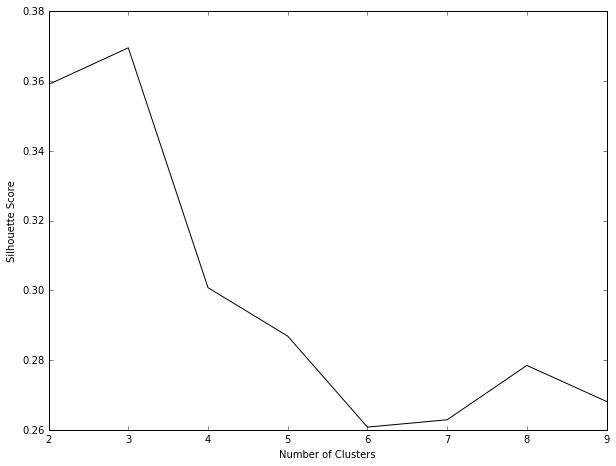

In [19]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

plt.figure(figsize=(10,7.5))
plt.plot(np.arange(2,10), silhouette, c="black")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.35905181557874033)


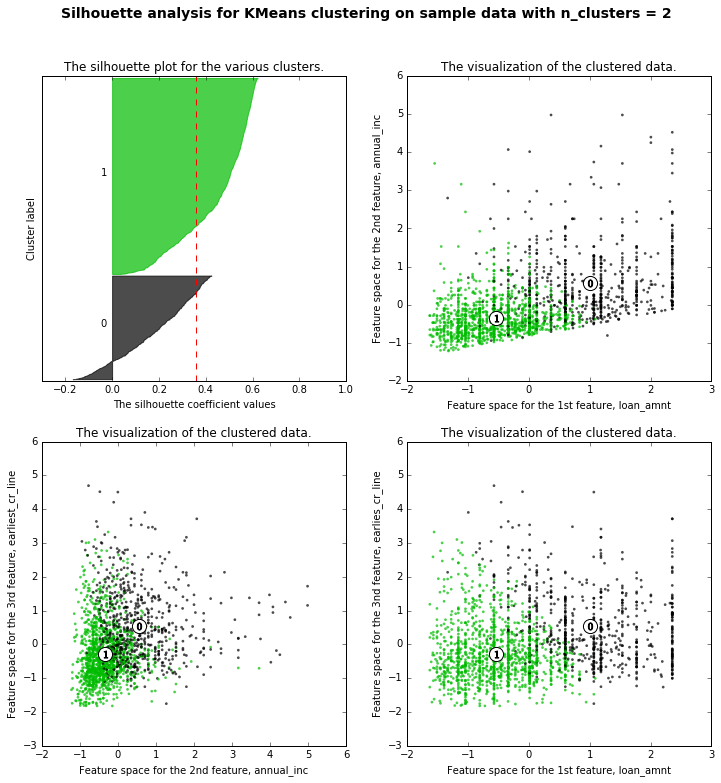

('For n_clusters =', 3, 'The average silhouette_score is :', 0.3695280660274049)


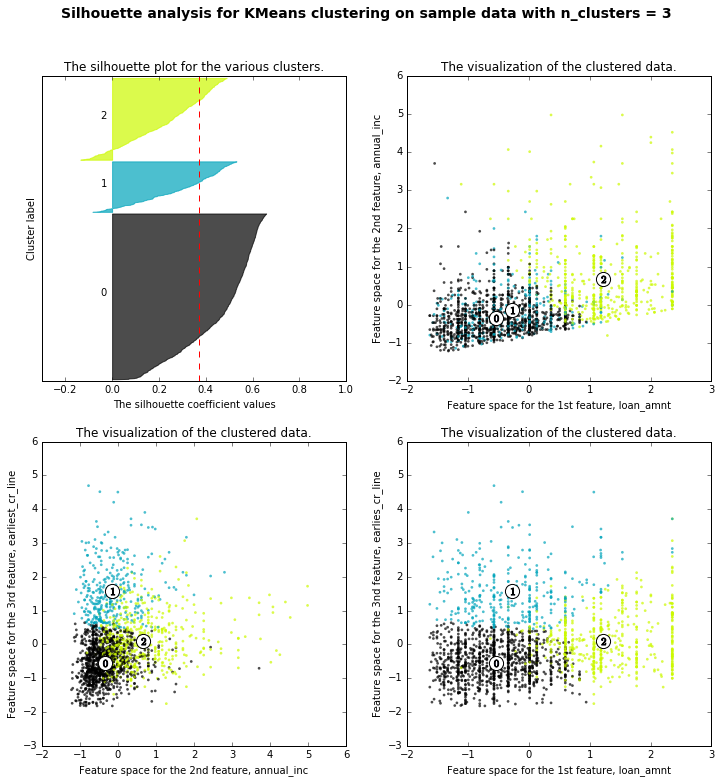

('For n_clusters =', 4, 'The average silhouette_score is :', 0.30075700796383009)


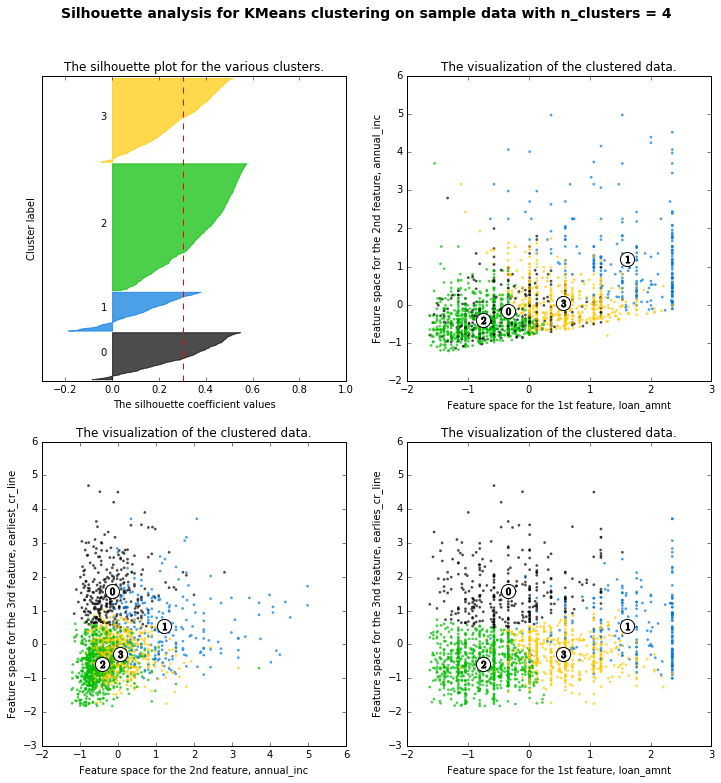

('For n_clusters =', 5, 'The average silhouette_score is :', 0.27606674402829862)


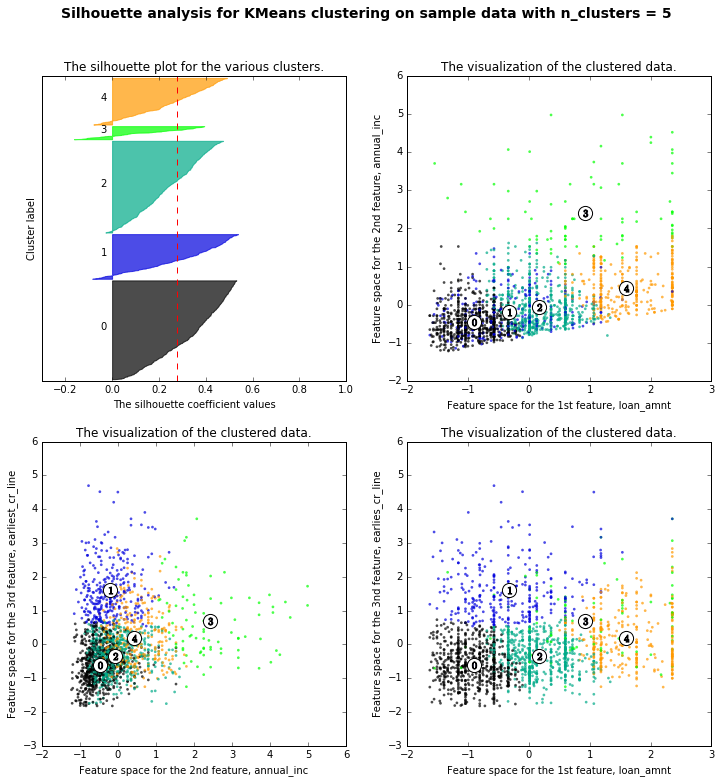

('For n_clusters =', 6, 'The average silhouette_score is :', 0.2657238684390506)


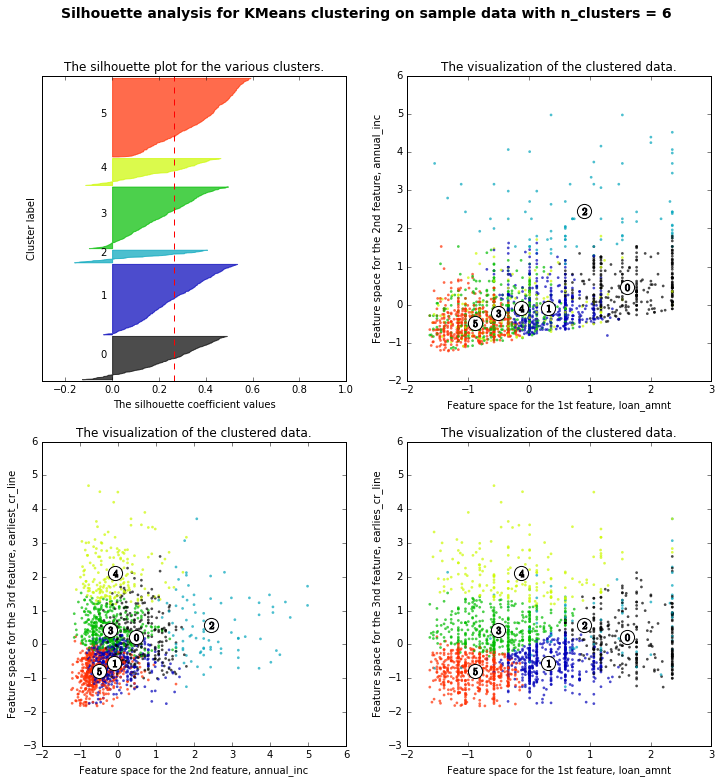

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
    
range_n_clusters = [2, 3, 4, 5, 6]
    
for n_clusters in range_n_clusters:
    # Create a subplot with 2 row and 2 columns
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_size_inches(12, 12)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.3, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_new) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X_new)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_new, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_new, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed (1st and 2nd features)
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_new[:,0], X_new[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature, loan_amnt")
    ax2.set_ylabel("Feature space for the 2nd feature, annual_inc")

    # 3rd Plot showing the actual clusters formed (2nd and 3rd features)
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax3.scatter(X_new[:,1], X_new[:,2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax3.scatter(centers[:, 1], centers[:, 2],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax3.scatter(c[1], c[2], marker='$%d$' % i, alpha=1, s=50)

    ax3.set_title("The visualization of the clustered data.")
    ax3.set_xlabel("Feature space for the 2nd feature, annual_inc")
    ax3.set_ylabel("Feature space for the 3rd feature, earliest_cr_line")
    
    # 4th Plot showing the actual clusters formed (1st and 3rd features)
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax4.scatter(X_new[:,0], X_new[:,2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax4.scatter(centers[:, 0], centers[:, 2],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax4.scatter(c[0], c[2], marker='$%d$' % i, alpha=1, s=50)

    ax4.set_title("The visualization of the clustered data.")
    ax4.set_xlabel("Feature space for the 1st feature, loan_amnt")
    ax4.set_ylabel("Feature space for the 3nd feature, earlies_cr_line")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Handling too many features: Principal Component Analysis (PCA) Vs. Multiple Discriminant Analysis (MDA)

The main purposes of a principal component analysis are the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.

In [21]:
from sklearn import cluster
import pandas as pd
data = pd.read_csv("../files/iris.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


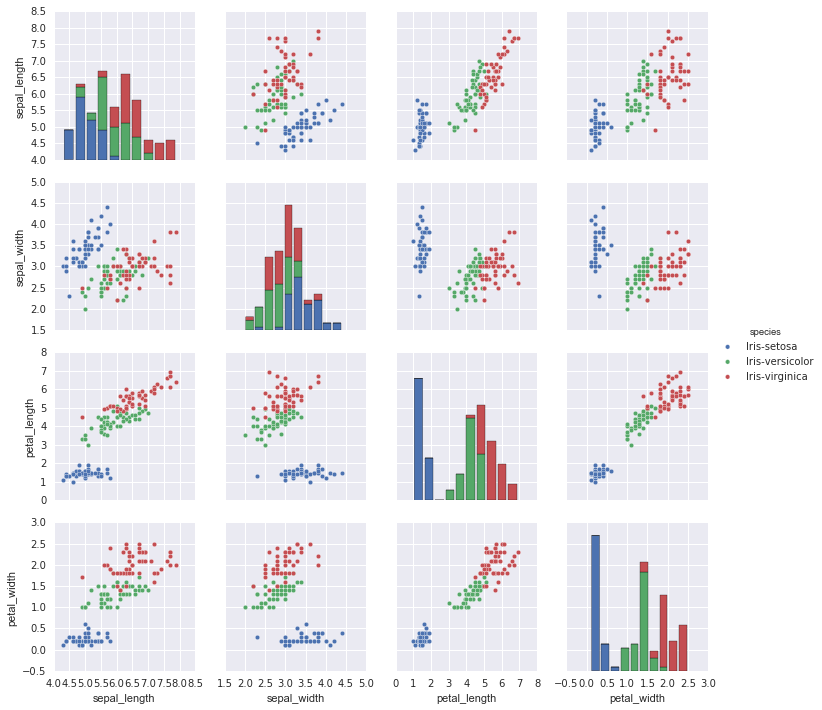

In [22]:
import seaborn as sns
sns.pairplot(data, hue='species')

In [23]:
X = data.drop('species', axis=1)
y = data.species

In [24]:
X = preprocessing.scale(X)

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

In [26]:
X_trans = pca.fit_transform(X)
X_trans.shape

(150, 2)

In [27]:
X_plot = pd.DataFrame(X_trans)
X_plot[2] = data.species
X_plot.columns = ['feature_1', 'feature_2', 'label']
X_plot.head()

,feature_1,feature_2,label
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


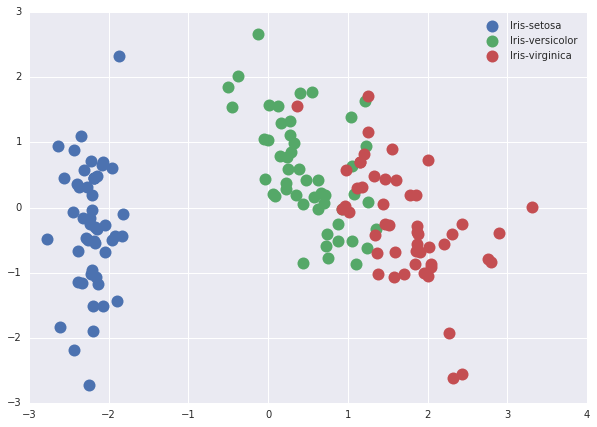

In [28]:
groups = X_plot.groupby('label')

# Plot
fig, ax = plt.subplots(figsize=(10,7))
for name, group in groups: 
    ax.plot(group.feature_1, group.feature_2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

In [29]:
components = pd.DataFrame(pca.components_)
components.columns = data.columns[0:4]
components.index = ['feature_1', 'feature_2']
components

,sepal_length,sepal_width,petal_length,petal_width
feature_1,0.522372,-0.263355,0.581254,0.565611
feature_2,-0.372318,-0.925556,-0.021095,-0.065416


### PCA on our Lending Club Data

In [30]:
data = pd.read_csv("../files/lending_club.csv")
X = data.sample(n=1000, random_state=1)
X.shape

(1000, 8)

In [31]:
X = preprocessing.scale(X)

In [32]:
k_means = cluster.KMeans(max_iter=100, n_init=3, random_state=1, n_clusters=4)
k_means.fit(X)
labels = k_means.labels_

In [33]:
pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_

array([ 0.27083396,  0.15042335])

In [34]:
X_trans = pca.fit_transform(X)
X_trans.shape

(1000, 2)

In [35]:
X_plot = pd.DataFrame(X_trans)
X_plot[2] = labels
X_plot.columns = ['feature_1', 'feature_2', 'label']
X_plot.head()

,feature_1,feature_2,label
0,-1.507662,1.289802,0
1,-1.950559,-1.184004,0
2,1.286584,0.341291,3
3,2.042074,-0.613664,2
4,0.932552,-0.401897,2


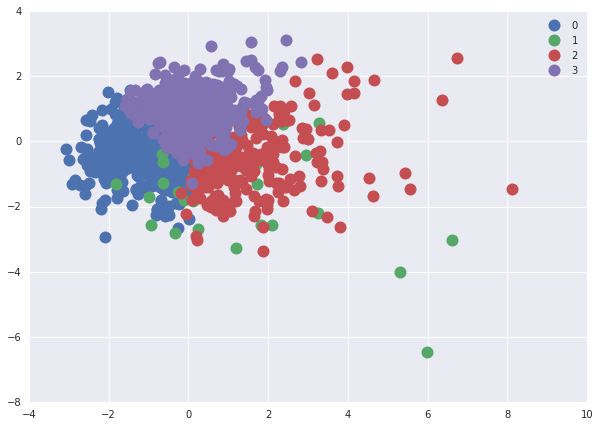

In [36]:
groups = X_plot.groupby('label')

# Plot
fig, ax = plt.subplots(figsize=(10,7))
for name, group in groups: 
    ax.plot(group.feature_1, group.feature_2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

In [37]:
components = pd.DataFrame(pca.components_)
components.columns = data.columns

In [38]:
components

,loan_amnt,int_rate,emp_length,annual_inc,delinq_2yrs,earliest_cr_line,total_acc,total_bal_ex_mort
0,0.436447,0.005825,0.194186,0.463618,0.146988,0.296231,0.461926,0.483835
1,-0.079368,-0.695125,0.351380,0.178588,-0.317540,0.408330,-0.121268,-0.269946
